# Designing one-class classification problem, one-layer network with Keras - Example 1

In this example, we are using a sigmoid activation at the last layer, binary cross-entropy as the loss, stochastic gradient descent as the optimizer, and classes 0 and 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def plot_fun(features,labels,classes):
  plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs', 
         features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'g^',markersize=15)
  #plt.axis([-2,2,-2,2])
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
  plt.show()

def plot_fun_thr(features,labels,thre_parms,classes):
  #ploting the data points
  plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs',
           features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'g^', 
           markersize=15)
  #plt.axis([-1,2,-1,2])
  #ploting the seperating line
  x1 = np.linspace(-2,2,50)
  x2 = -(thre_parms[0]*x1+thre_parms[2])/thre_parms[1] 
                      #a X1 + b X2 + c=0 --> x2 = -(a X1 + c)/b
  plt.plot(x1, x2, '-r')
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
  #plt.pause(0.5)
  #plt.show()

def plot_curve(accuracy_train, loss_train):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Training loss')

  plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


c:\users\milind.desktop-gbr1bs2\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


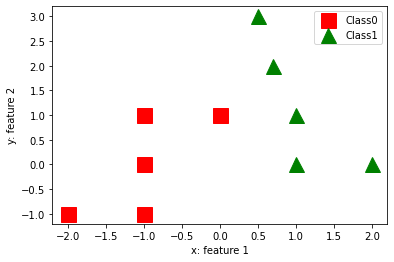

Epoch 1/50
3/3 [==============================] - 1s 2ms/step - loss: 0.5812 - accuracy: 0.8000
Epoch 2/50
3/3 [==============================] - 0s 4ms/step - loss: 0.2756 - accuracy: 0.9000
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2172 - accuracy: 0.9000
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1888 - accuracy: 0.9000
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 0.1591 - accuracy: 0.9000
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1463 - accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.9000
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.1276 - accuracy: 0.9000
Epoch 9/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.9000
Epoch 10/50
3/3 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.9000
Epoch 11/50
3/3 [======================

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#defining the model
model_a=Sequential()
model_a.add(Dense(input_dim=2, units=1, activation='sigmoid'))
model_a.summary()

from tensorflow.keras.optimizers import SGD
model_a.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=0.9), 
              metrics=['accuracy'])

features=np.array([[1,1], [1,0], [0,1], [-1,-1], [0.5,3], 
                   [0.7,2], [-1,0], [-1,1], [2,0], [-2,-1]])
labels=np.array([1,1,0,0,1,1,0,0,1,0])
classes=[0,1]

plot_fun(features,labels,classes)

history=model_a.fit(features, labels,
          batch_size=4,
          epochs=50,
          verbose=1) 

# validation_data=(x_val, y_val)

#Normalization
#features = (features-np.mean(features,axis=0))/np.std(features,axis=0)

[array([[5.0534716],
       [0.7216977]], dtype=float32), array([-2.1359003], dtype=float32)]
[ 5.0534716  0.7216977 -2.1359003]


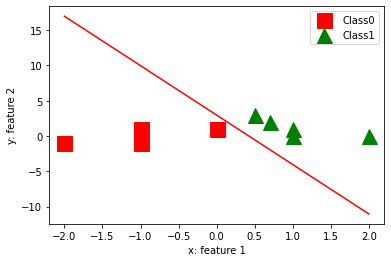

In [4]:
weights=model_a.layers[0].get_weights() 
print(weights)
thre_parms=np.array(weights[0])#This first item is the weights for the inputs 
thre_parms=np.append(thre_parms, weights[1]) #second item the weights for the bias
print(thre_parms)
plot_fun_thr(features,labels,thre_parms,classes)

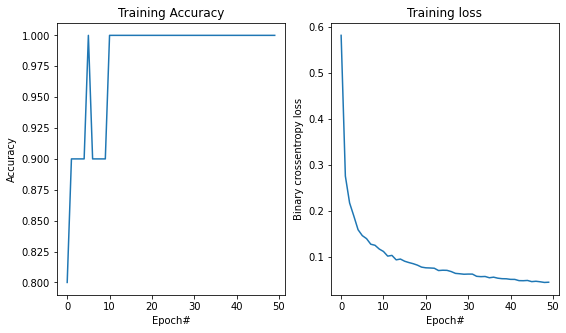

In [6]:
plt.figure(figsize=[9,5])
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)

In [7]:
#Evaluating the model on a held-out samples
test_samples=np.array([[0,0],[2,2]])
test_y=np.array([0,1])
score=model_a.evaluate(test_samples,test_y)
print('Total loss on testing set: ', score[0])
print('Accuracy of testing set: ', score[1])

#predicting the class of a new sample
test_samples=np.array([[0,-2],[2,5]])
test_class1_prob=model_a.predict(test_samples)
print('The probability of class 1 for the test samples is: \n', 
      test_class1_prob)
test_lab=np.uint8(test_class1_prob>0.5)
print('The classes for the test samples is: \n', test_lab)

1/1 [==============================] - 0s 203ms/step - loss: 0.0559 - accuracy: 1.0000
Total loss on testing set:  0.05587324872612953
Accuracy of testing set:  1.0
The probability of class 1 for the test samples is: 
 [[0.02713829]
 [0.99999064]]
The classes for the test samples is: 
 [[0]
 [1]]


# Designing one-class classification problem, two-layer network  with Keras - Example 2

In this example, we are using a sigmoid activation at the last layer, binary cross-entropy as the loss, stochastic gradient descent as the optimizer, and classes 0 and 1.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


c:\users\milind.desktop-gbr1bs2\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


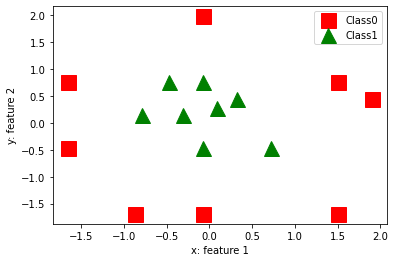

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7901 - accuracy: 0.5000
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.6250
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.6875
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.7500
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.7500
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6250
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.7500
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6875
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7500
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.7500
Epoch 11/200
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0675 - accuracy: 1.0000
Epoch 85/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 1.0000
Epoch 86/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 1.0000
Epoch 87/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 1.0000
Epoch 88/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 1.0000
Epoch 89/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 1.0000
Epoch 90/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 1.0000
Epoch 91/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 1.0000
Epoch 92/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 1.0000
Epoch 93/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 1.0000
Epoch 94/200
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 167/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 1.0000
Epoch 168/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 1.0000
Epoch 169/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 1.0000
Epoch 170/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 1.0000
Epoch 171/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 1.0000
Epoch 172/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 1.0000
Epoch 173/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 1.0000
Epoch 174/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 1.0000
Epoch 175/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 1.0000
Epoch 176/200
4/4 [=====

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
#defining the model
model_a=Sequential()
model_a.add(Dense(input_dim=2, units=3, activation='tanh'))
model_a.add(Dense(units=1, activation='sigmoid'))
model_a.summary()

#compiling the model
model_a.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=0.5), 
              metrics=['accuracy'])

#Loading the data and normalization
features=np.array([[1,1], [1,-1], [0,-1], [0.5,3], [0.7,2], 
                   [-1,3], [-1,1], [3,-1],[1,5],[3.5,2.5],[3,3],[1.5,2.5],[1,3],
                   [2,1],[0.1,2],[1.2,2.2]])
labels=np.array([1,0,0,1,1,0,0,0, 0,0,0,1,1,1,1,1], dtype=np.uint8)
classes=[0,1]

features = (features-np.mean(features,axis=0))/np.std(features,axis=0) #normalization
plot_fun(features,labels,classes)

history=model_a.fit(features, labels,
          batch_size=4,
          epochs=200,
          verbose=1) 

#          validation_data=(x_val, y_val)

[array([[0.4295625, 3.0829272, 2.1792889],
       [3.0254202, 1.1417822, 2.4292245]], dtype=float32), array([ 2.475105 ,  2.882313 , -2.9839365], dtype=float32)]


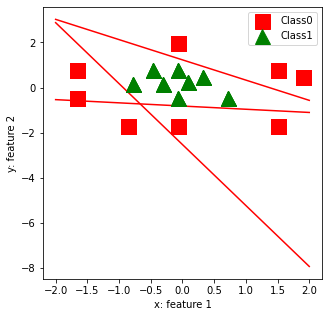

In [10]:
weights=model_a.layers[0].get_weights() 
print(weights)
plt.figure(figsize=[5,5])
for node_i in range(weights[0].shape[1]):
  thre_parms=np.array(weights[0][:,node_i])#This first item is the weights for the inputs 
  thre_parms=np.append(thre_parms, weights[1][node_i]) #second item the weights for the bias
  plot_fun_thr(features,labels,thre_parms,classes)
plt.show()

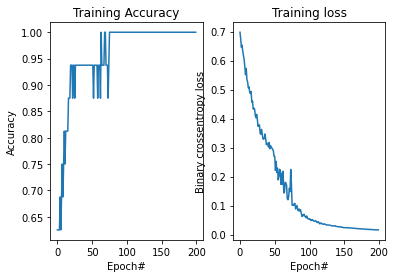

In [ ]:
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)